In [25]:
#import the liabraries 


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers  import SGD
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [26]:
# load dataset 

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [32]:
#testing the loaded data

print("Shape of X is :",X_train.shape)
print("Shape of Y is :",y_train.shape)
print("Shape of X is :",X_test.shape)
print("Shape of X is :",y_test.shape)

Shape of X is : (60000, 28, 28)
Shape of Y is : (60000,)
Shape of X is : (10000, 28, 28)
Shape of X is : (10000,)


In [35]:
#normalize 

X_train , X_test = X_train / 255.0 , X_test/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [38]:
#network define 

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#train the model with SGD 

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1116 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1143 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1122 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1109 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1126 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1118 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1127 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1112 - loss: 2.3014 - 

In [45]:
Loss,Accuracy= model.evaluate(X_test,y_test)

print(Loss)
print(Accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3008
2.3009963035583496
0.11349999904632568


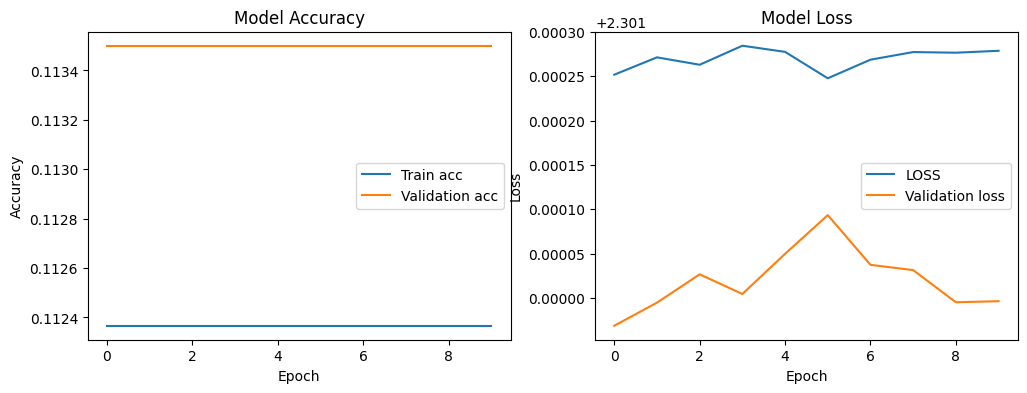

In [51]:
#plot the graph

plt.figure(figsize=(12,4))

#plot accuracy

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Train acc")
plt.plot(history.history['val_accuracy'],label="Validation acc")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="LOSS")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()